In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from func import neuron_layer,neuron_layers

In [ ]:
my_layers = neuron_layers([2,1,2,1],0.0005)

In [ ]:
data_store = []
expected_store = []
desired_store = []


record_weigths_1 = []
record_weigths_2 = []
record_weigths_3 = []
record_errros = []


acc = 0
for i in range (0,250):
    num_1 = random.randint(1,10)
    num_2 = random.randint(1,20)

    data = np.reshape(np.array([num_1,acc])  , (2,1))
    ref = np.reshape(np.array([acc]), (1,1))

    err , expected , input_data = my_layers.calc_output(data,ref)
    my_layers.back_prop()
    
    exp_2 = float(expected[0])
    acc = 0.43*acc - 0.61*exp_2 + num_2


    record_errros.append(my_layers.layers[-1].total_error**2)
    record_weigths_1.append(my_layers.layers[0].b)
    record_weigths_2.append(my_layers.layers[1].w)
    record_weigths_3.append(my_layers.layers[2].w)
    desired_store.append(expected)
    expected_store.append(ref)





# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 10))
# Plot data on each subplot
axs[0].plot(record_errros)
axs[0].set_title('Errors')

axs[1].plot(np.array(record_weigths_1)[:,0,0],color='violet')
axs[1].plot(np.array(record_weigths_2)[:,0,0],color='green')
axs[1].plot(np.array(record_weigths_2)[:,1,0],color='blue')
axs[1].set_title('Weigths')

axs[2].plot(np.array(record_weigths_3)[:,0,0],color='violet')
axs[2].plot(np.array(record_weigths_3)[:,0,1],color='green')
axs[2].set_title('Weigths')

axs[3].plot(np.array(expected_store)[:,0,0],color='red')
axs[3].plot(np.array(desired_store)[:,0,0],color='yellow')
axs[3].set_title('Expected vs Desired')

In [ ]:
data_store = []
expected_store = []
desired_store = []


record_weigths_1 = []
record_weigths_2 = []
record_weigths_3 = []
record_errros = []


acc = 0
for i in range (0,50):
    num_1 = random.randint(1,10)
    num_2 = random.randint(1,20)

    data = np.reshape(np.array([num_1,acc])  , (2,1))
    ref = np.reshape(np.array([acc]), (1,1))

    err , expected , input_data = my_layers.calc_output(data,ref)
    
    exp_2 = float(expected[0])
    acc = 0.43*acc - 0.61*exp_2 + num_2
    desired_store.append(expected)
    expected_store.append(ref)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
# Plot data on each subplot
axs[0].plot(np.array(expected_store)[:,:,0],color='yellow',marker="*")
axs[0].set_title('Neuron Output')

axs[0].plot(np.array(desired_store)[:,:,0],color='red',marker="*")
#axs[1].plot(np.array(desired_store),color='yellow')
axs[1].set_title('Expected')
    

In [ ]:
# Step test
""""
da_dw = -2*err

##### 1- w_1*x  + b_1 = a_0      || Layer 1
##### 2- c_0 = σ(a_0)
##### 3- w_2*c_0 + b_2 = a_1     || Layer 2
##### 4- c_1 = σ(a_1) 
##### 5- w_3*c_1 + b_3 = a_2     || Layer 3 (Output Layer)

##### First weigtth derivatives
#####
##### dJ/dw_2 = [ (dJ/dy)*(dy/da) ] * d_c1
##### --> Send for other derivatives dJ/dc = [ (dJ/dy)*(dy/da) ]*w

######## dC/dw_2 = (dC/dy)*(dy/da_2)*(da_2/d_c1)*(dc_1/d_a1)*(da_1/dw_2)
##### (dJ/dy)   = -2J
##### (dy/da_2) = 1
##### (da_2/d_c1) = w_3
##### (dc_1/d_a1) = -c_1(1-c_1)
##### (da_1/dw_2) = c_0

##### dw_2 @ layer[1]

dJ_da = -2*my_layers.layers[-1].j 
a = (len(my_layers.layers) - 1 )

for i in range(0,3):

    print("!!! Neuron ",a)
    print(np.shape(dJ_da),np.shape(my_layers.layers[a].x),type(my_layers.layers[a].x))

    if a == (len(my_layers.layers) - 1 ):
        dJ_da = dJ_da.T
        # No activation layer
    else:
        dJ_da = dJ_da * my_layers.layers[a].sig.T
        
    print(type(my_layers.layers[a].x),np.shape(my_layers.layers[a].x))

    dJ_dw = dJ_da.T @  my_layers.layers[a].x.T
    
    da_dc = my_layers.layers[a].w
    
    dJ_dc = dJ_da @ da_dc

    dJ_da = dJ_dc ## Pass down


    print("Derivatives of the weigth factos \n {} \n".format(dJ_dw))
    print(np.shape(dJ_dw))

    a = a-1
"""

In [50]:
### Neuraon Network Parameters
hidden_layers=[1,4,2,2,2]
learning_rate = 0.3
my_layers = neuron_layers(hidden_layers,learning_rate)

for i in range (0,len(my_layers.layers)):
    print("Neuron num | {} | \t Input Size | {} | \t Output Size  | {} | \t ".format(i, np.shape(my_layers.layers[i].w)[1], np.shape(my_layers.layers[i].w)[0]) )

### Simulations parameters
#### TIME
# Sample time
st = 1
# Start- End time 

data_count = 500
#Train sample count
train_count = 250
#Validate sample count
validate_count = data_count-train_count

# Time array 
time_array = np.arange(0, train_count, 1)

### Data
in_out_cnt = hidden_layers[0] + hidden_layers[-1] 
my_data_set = np.zeros((data_count,in_out_cnt,1))


def _fnc(x,num):
    if num == 1:
            a= 10*np.sin(i)
            return a
    elif num == 2:
            if x % 3 == 0:    
                a= 10+5*(x%5) +random.randint(0,10)*0.1
            elif x%2 == 0:
                a = np.sin(x*0.5)
            else:
                a = 10-(x%5)
                 
            return a
    else:
        return np.exp(np.sin(i)*0.5)

for i in range (0,data_count):
    val_1 = (_fnc(i,1))
    val_2 = (_fnc(i,2))
    val_3 = (_fnc(i,3))

    arr = np.array([val_1,val_2]).T
    arr = np.reshape(arr,(np.shape(arr)[0],1))

    arr_2 = np.array([i])
    arr_2 = np.reshape(arr_2,(np.shape(arr_2)[0],1))

    my_data_set[i,1,:] =   arr[0]
    my_data_set[i,2,:] =   arr[1]
    my_data_set[i,0,:] =  arr_2

## Split data sets into train and validate
my_data_set_shuffled = np.random.shuffle(my_data_set)

my_train_set = my_data_set[train_count:,:,:]
my_validate_set = my_data_set[validate_count:,:,:]

Neuron num | 0 | 	 Input Size | 1 | 	 Output Size  | 4 | 	 
Neuron num | 1 | 	 Input Size | 4 | 	 Output Size  | 2 | 	 
Neuron num | 2 | 	 Input Size | 2 | 	 Output Size  | 2 | 	 
Neuron num | 3 | 	 Input Size | 2 | 	 Output Size  | 2 | 	 


In [51]:
### Store the output
output = []
error  = []


output = np.zeros((np.shape(my_train_set)[0],2,1))
error = np.zeros((np.shape(my_train_set)[0],2,1))

store_ref = np.zeros((np.shape(my_train_set)[0],2,1))

for i in range (0,train_count):
    ### Feed forward
    # Prepare input
    single_ref = np.array([float(my_train_set[i,1,:]),float(my_train_set[i,2,:])])
    single_data = np.array([float(my_train_set[i,0,:])])
    single_data = np.reshape(single_data,(1,1))
    single_ref = np.reshape(single_ref,(2,1))
    ##
    err,exp,desired = my_layers.calc_output(single_data,single_ref)
    my_layers.back_prop()
    

    ## Backprop
    ## Save the results
    output[i,:,:]= exp
    error [i,:,:]= err
    store_ref[i,:,:]=desired

Input to the neuron **** x --> [[321.]]
Output x 	 [[ 6.21804615]
 [17.50584849]]
 Backproped @ Neuron: 3 
 Backproped @ Neuron: 2 
 Backproped @ Neuron: 1 
 Backproped @ Neuron: 0 
Input to the neuron **** x --> [[443.]]
Output x 	 [[-0.23171323]
 [-1.00548262]]
 Backproped @ Neuron: 3 
 Backproped @ Neuron: 2 
 Backproped @ Neuron: 1 
 Backproped @ Neuron: 0 
Input to the neuron **** x --> [[380.]]
Output x 	 [[-0.30525586]
 [ 3.79780695]]
 Backproped @ Neuron: 3 
 Backproped @ Neuron: 2 
 Backproped @ Neuron: 1 
 Backproped @ Neuron: 0 
Input to the neuron **** x --> [[307.]]
Output x 	 [[0.67182888]
 [2.11780235]]
 Backproped @ Neuron: 3 
 Backproped @ Neuron: 2 
 Backproped @ Neuron: 1 
 Backproped @ Neuron: 0 
Input to the neuron **** x --> [[75.]]
Output x 	 [[-4.34068063]
 [ 5.64712094]]
 Backproped @ Neuron: 3 
 Backproped @ Neuron: 2 
 Backproped @ Neuron: 1 
 Backproped @ Neuron: 0 
Input to the neuron **** x --> [[212.]]
Output x 	 [[-4.06296207]
 [ 8.79884838]]
 Backproped

Average mean square error -> 	 0st Estimation 68.63619718609328
Average mean square error for chosen frame-> 	 0st Estimation 68.63619718609328
Average mean square error -> 	 1st Estimation 116.08262106483446
Average mean square error for chosen frame-> 	 1st Estimation 116.08262106483446


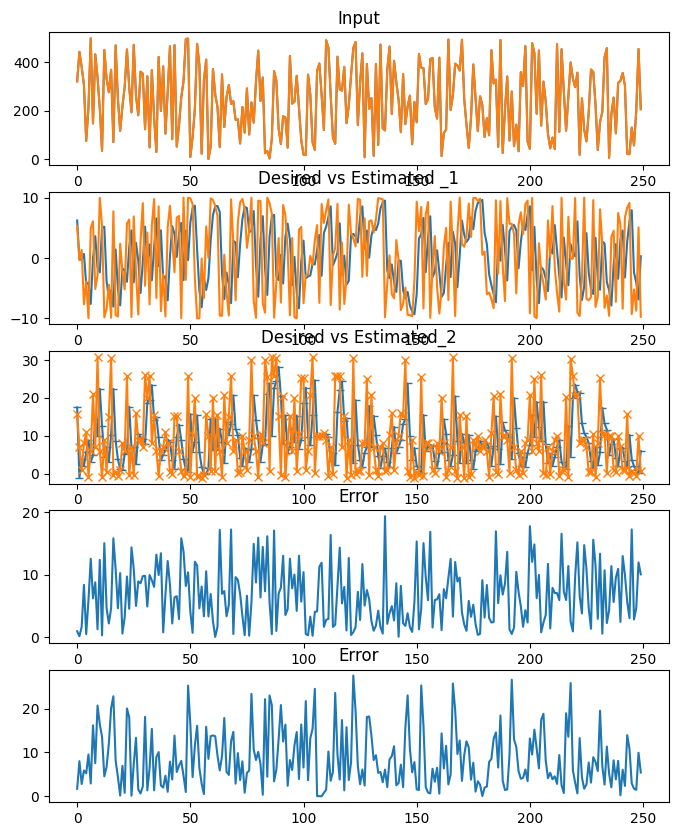

In [52]:
fig_2, axs = plt.subplots(5, 1, figsize=(8, 10))
plt_str = 0
assert (train_count > plt_str)

for i in range (0,np.shape(error)[1]):
    print("Average mean square error -> \t {}st Estimation {}".format(i,np.mean(((error)[:,i,0])**2)))
    print("Average mean square error for chosen frame-> \t {}st Estimation {}".format(i,np.mean(((error)[plt_str:,i,0])**2)))
    
# Plot data on each subplot
axs[0].plot(time_array[plt_str:], np.array(store_ref)[plt_str:,0,0])
axs[0].plot(time_array[plt_str:], np.array(my_train_set)[plt_str:,0,:])
axs[0].set_title('Input')


axs[1].plot(time_array[plt_str:], np.array(output)[plt_str:,0,:])
axs[1].plot(time_array[plt_str:], np.array(my_train_set)[plt_str:,1,:])
axs[1].set_title('Desired vs Estimated _1')

axs[2].plot(time_array[plt_str:], np.array(output)[plt_str:,1,:],marker = "_")
axs[2].plot(time_array[plt_str:], np.array(my_train_set)[plt_str:,2,:],marker = "x")
axs[2].set_title('Desired vs Estimated_2')


axs[3].plot(time_array[plt_str:], (((error)[plt_str:,0,0])**2)**0.5)
axs[3].set_title('Error')

axs[4].plot(time_array[plt_str:], (((error)[plt_str:,1,0])**2)**0.5)
axs[4].set_title('Error')

plt.show()

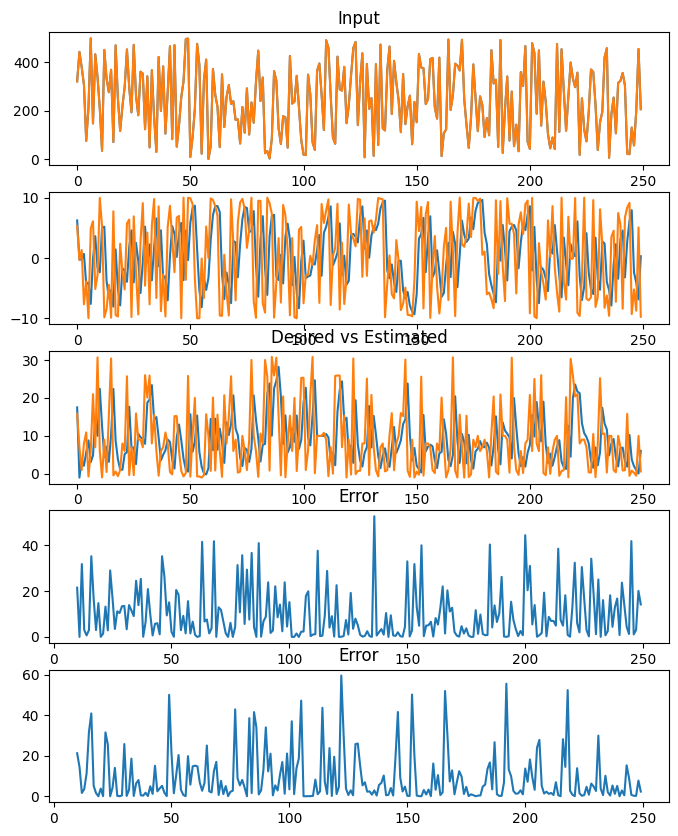

In [53]:
fig_2, axs = plt.subplots(5, 1, figsize=(8, 10))

# Plot data on each subplot
axs[0].plot(time_array, np.array(store_ref)[:,:,0])
axs[0].set_title('Input')


axs[1].plot(time_array, np.array(output)[:,0,:])
axs[1].plot(time_array, np.array(my_train_set)[:,1,:])

axs[2].plot(time_array, np.array(output)[:,1,:])
axs[2].plot(time_array, np.array(my_train_set)[:,2,:])
axs[2].set_title('Desired vs Estimated')


axs[3].plot(time_array[10:], ((error)[10:,0,0])**2/np.average(np.array(my_train_set)[:,1,:]**2)**0.5)
axs[3].set_title('Error')

axs[4].plot(time_array[10:], ((error)[10:,1,0])**2/(np.average(np.array(my_train_set)[10:,2,:]**2)**0.5))
axs[4].set_title('Error')

plt.show()